# Установка библиотек

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
def a_linreg_fit(
    features: np.ndarray,
    target: np.ndarray,
) -> tuple[np.ndarray, np.float32]:
    weights = np.linalg.inv(features.T @ features) @ features.T @ target
    bias = np.mean(target) - np.mean(features, axis=0) @ weights

    return weights, bias


def a_linreg_predict(
    features: np.ndarray,
    weights: np.ndarray,
    bias: np.float32,
) -> np.ndarray:
    if weights is None or bias is None:
        raise ValueError("Model is not fitted yet.")

    return features @ weights + bias

NameError: name 'np' is not defined

In [3]:
def c_linreg_fit(
    features: np.ndarray,
    target: np.ndarray,
    target_error_value: np.float32 = 0.01,
    max_iter: np.int32 = 10_000,
    learning_rate: np.float32 = 0.01,
) -> tuple[np.ndarray, np.float32]:
    weights = np.random.randn(features.shape[1])
    bias = np.random.randn()

    for _ in range(max_iter):
        predictions = c_linreg_predict(features, weights, bias)

        error_value = mean_squared_error(target, predictions)
        if error_value <= target_error_value:
            break

        error_grad = 2 * (predictions - target) / target.size
        dw = features.T @ error_grad
        db = np.sum(error_grad)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias


def c_linreg_predict(
    features: np.ndarray,
    weights: np.ndarray,
    bias: np.float32,
) -> np.ndarray:
    if weights is None or bias is None:
        raise ValueError("Model is not fitted yet.")

    return features @ weights + bias

In [7]:
df = pd.read_csv(
    "../data/Housing price in Beijing.csv",
    encoding="gbk",
)

/var/folders/fy/g1qqmmtj5n797vr8g06trd4r0000gn/T/ipykernel_83684/2139410778.py:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [5]:
df.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


## Преобразование типов и базовая предобработка

In [6]:
df["livingRoom"] = pd.to_numeric(df["livingRoom"], errors="coerce")
df["drawingRoom"] = pd.to_numeric(df["drawingRoom"], errors="coerce")
df["kitchen"] = pd.to_numeric(df["kitchen"], errors="coerce")
df["bathRoom"] = pd.to_numeric(df["bathRoom"], errors="coerce")
df["constructionTime"] = pd.to_numeric(df["constructionTime"], errors="coerce")

## Выбираем признаки и целевую переменную

In [7]:
TARGET_NAME = "totalPrice"
FEATURES_NAMES = ["square"]

In [ ]:
df_cleaned = df.dropna(subset=[TARGET_NAME] + FEATURES_NAMES).copy()

# Удаление нереалистичных значений
df_cleaned = df_cleaned.where(
    df_cleaned["square"] > 10
).dropna()  # Квартиры меньше 10 кв.м маловероятны
df_cleaned = df_cleaned.where(
    df_cleaned["totalPrice"] > 0
).dropna()  # Цена должна быть положительной


def remove_outliers(df, column, k=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    return df.where((df[column] >= lower_bound) & (df[column] <= upper_bound))


for feature in FEATURES_NAMES + [TARGET_NAME]:
    df_cleaned = remove_outliers(df_cleaned, feature).dropna()

df_cleaned["price_per_meter"] = df_cleaned["totalPrice"] / df_cleaned["square"]

df_cleaned = remove_outliers(df_cleaned, "price_per_meter").dropna()

df_normalized = df_cleaned.copy()


def robust_normalize(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    median = series.median()
    return (series - median) / iqr


# Применяем робастную нормализацию к признакам
for feature in FEATURES_NAMES:
    df_normalized[feature] = robust_normalize(df_normalized[feature])

df_normalized[TARGET_NAME] = robust_normalize(df_normalized[TARGET_NAME])

normalization_params = {
    "features": {
        feature: {
            "median": df_cleaned[feature].median(),
            "iqr": df_cleaned[feature].quantile(0.75)
            - df_cleaned[feature].quantile(0.25),
        }
        for feature in FEATURES_NAMES
    },
    "target": {
        "median": df_cleaned[TARGET_NAME].median(),
        "iqr": df_cleaned[TARGET_NAME].quantile(0.75)
        - df_cleaned[TARGET_NAME].quantile(0.25),
    },
}

print("Статистика очистки данных:")
print(f"Исходный размер датасета: {len(df)}")
print(f"Размер после очистки: {len(df_cleaned)}")
print(f"Процент сохраненных данных: {(len(df_cleaned) / len(df) * 100):.2f}%")

print("\nСтатистика нормализованных данных:")
print("\nПризнаки:")
for feature in FEATURES_NAMES:
    print(f"\n{feature}:")
    print(
        f"Медиана: {normalization_params['features'][feature]['median']:.2f}"
    )
    print(f"IQR: {normalization_params['features'][feature]['iqr']:.2f}")

print(f"\nЦелевая переменная ({TARGET_NAME}):")
print(f"Медиана: {normalization_params['target']['median']:.2f}")
print(f"IQR: {normalization_params['target']['iqr']:.2f}")

print("\nСтатистика нормализованных данных:")
print(df_normalized[FEATURES_NAMES + [TARGET_NAME]].describe())

Статистика очистки данных:
Исходный размер датасета: 318851
Размер после очистки: 137454
Процент сохраненных данных: 43.11%

Статистика нормализованных данных:

Признаки:

square:
Медиана: 71.15
IQR: 35.42

Целевая переменная (totalPrice):
Медиана: 335.00
IQR: 217.00

Статистика нормализованных данных:
              square     totalPrice
count  137454.000000  137454.000000
mean        0.165291       0.110808
std         0.752578       0.741131
min        -1.718803      -1.543318
25%        -0.389328      -0.447005
50%         0.000000       0.000000
75%         0.610672       0.552995
max         2.428289       2.368664


## Визуализация распределения данных

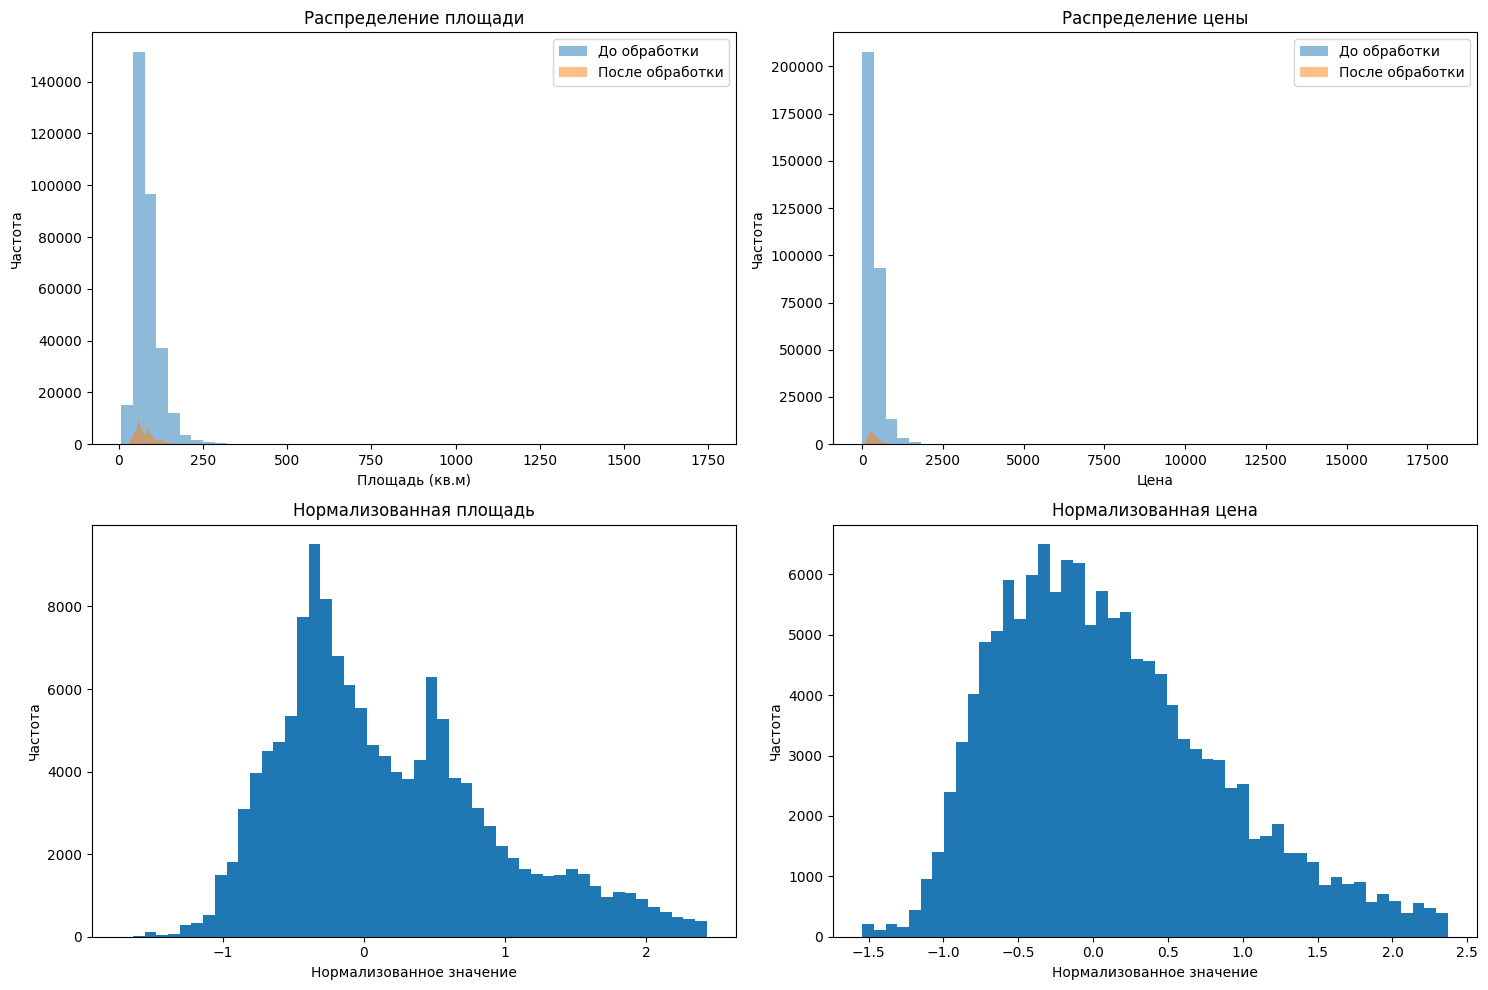

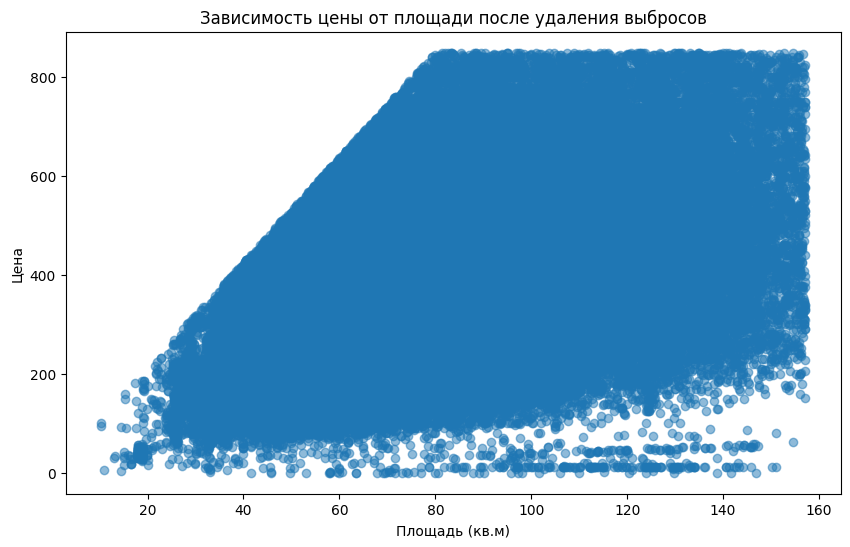

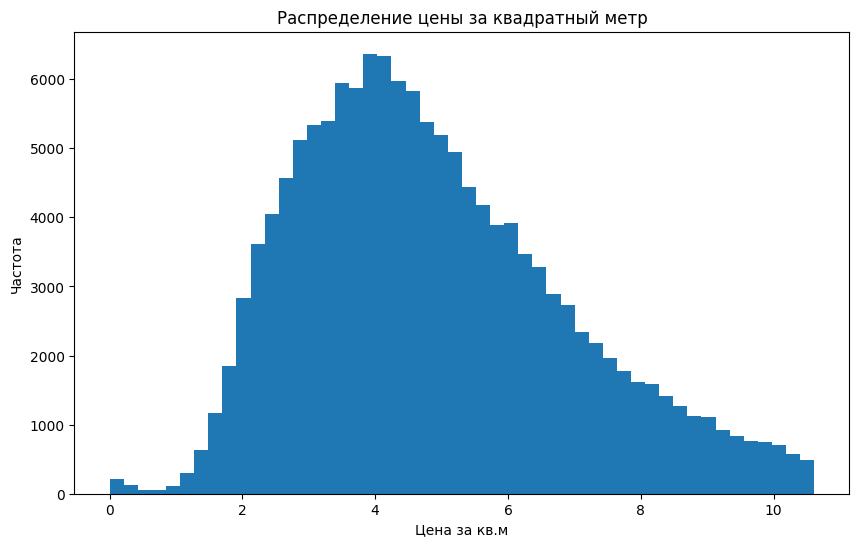

In [9]:
fig = plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(df["square"], bins=50, alpha=0.5, label="До обработки")
plt.hist(df_cleaned["square"], bins=50, alpha=0.5, label="После обработки")
plt.title("Распределение площади")
plt.xlabel("Площадь (кв.м)")
plt.ylabel("Частота")
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(df["totalPrice"], bins=50, alpha=0.5, label="До обработки")
plt.hist(df_cleaned["totalPrice"], bins=50, alpha=0.5, label="После обработки")
plt.title("Распределение цены")
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(df_normalized["square"], bins=50)
plt.title("Нормализованная площадь")
plt.xlabel("Нормализованное значение")
plt.ylabel("Частота")

plt.subplot(2, 2, 4)
plt.hist(df_normalized["totalPrice"], bins=50)
plt.title("Нормализованная цена")
plt.xlabel("Нормализованное значение")
plt.ylabel("Частота")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned["square"], df_cleaned["totalPrice"], alpha=0.5)
plt.title("Зависимость цены от площади после удаления выбросов")
plt.xlabel("Площадь (кв.м)")
plt.ylabel("Цена")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned["price_per_meter"], bins=50)
plt.title("Распределение цены за квадратный метр")
plt.xlabel("Цена за кв.м")
plt.ylabel("Частота")
plt.show()

In [10]:
df_normalized.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,price_per_meter
count,137454.000000,137454.000000,1.374540e+05,137454.000000,137454.000000,137454.000000,137454.000000,137454.000000,137454.000000,137454.000000,...,137454.000000,137454.000000,137454.000000,1.374540e+05,137454.000000,137454.000000,137454.000000,137454.000000,137454.000000,137454.000000
mean,116.415537,39.947415,1.142327e+12,27.566357,26.735366,0.110808,48678.915739,0.165291,1.932028,1.105650,...,1999.279112,3.001601,4.404594,7.319243e+01,0.560551,0.616977,0.586858,6.640585,60943.327164,4.867845
std,0.116670,0.096997,1.907459e+12,48.046276,44.701970,0.741131,20158.307339,0.752578,0.697334,0.482408,...,9.023836,1.145690,1.913037,2.699786e+04,0.496322,0.486126,0.492400,2.835842,19977.513190,2.015828
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,-1.543318,1.000000,-1.718803,0.000000,0.000000,...,1950.000000,1.000000,1.000000,1.400000e-02,0.000000,0.000000,0.000000,1.000000,10847.000000,0.000681
25%,116.342241,39.889225,1.111027e+12,1.000000,2.000000,-0.447005,33578.000000,-0.389328,1.000000,1.000000,...,1993.000000,3.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,45536.000000,3.357778
50%,116.417021,39.932268,1.111027e+12,6.000000,12.000000,0.000000,45591.500000,0.000000,2.000000,1.000000,...,2001.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,57333.000000,4.559064
75%,116.477920,40.002450,1.111027e+12,35.000000,33.000000,0.552995,61220.000000,0.610672,2.000000,1.000000,...,2006.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,71958.000000,6.121945
max,116.711337,40.252758,1.184867e+14,1677.000000,1085.000000,2.368664,106121.000000,2.428289,7.000000,4.000000,...,2016.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,179563.000000,10.612030


In [11]:
target_data = df_normalized[TARGET_NAME].to_numpy()
features_data = df_normalized[FEATURES_NAMES].to_numpy()

n_strata = 5
target_bins = pd.qcut(target_data, n_strata, labels=False)

features_train, features_test, target_train, target_test = train_test_split(
    features_data,
    target_data,
    test_size=0.2,
    random_state=42,
    stratify=target_bins,
)

weights_anal, bias_anal = a_linreg_fit(
    features=features_train,
    target=target_train,
)

weights_comp, bias_comp = c_linreg_fit(
    features=features_train,
    target=target_train,
    target_error_value=0.01,
    max_iter=1000,
    learning_rate=0.05,
)

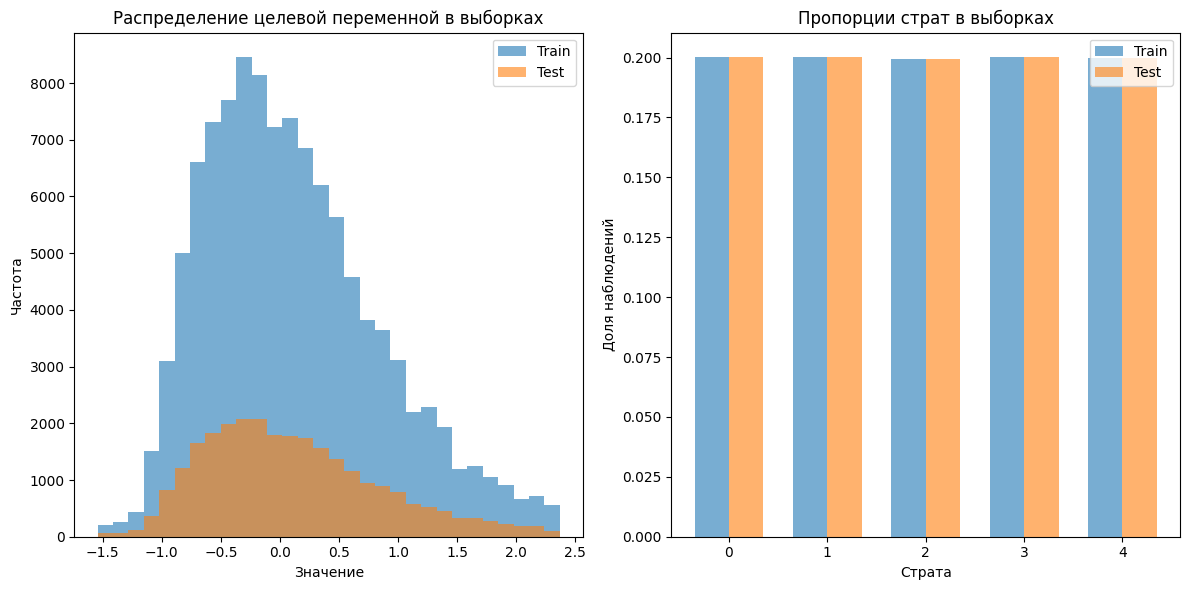

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(target_train, bins=30, alpha=0.6, label="Train")
plt.hist(target_test, bins=30, alpha=0.6, label="Test")
plt.title("Распределение целевой переменной в выборках")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.legend()

plt.subplot(1, 2, 2)
train_strata = pd.qcut(target_train, n_strata)
test_strata = pd.qcut(target_test, n_strata)

train_counts = train_strata.value_counts().sort_index()
test_counts = test_strata.value_counts().sort_index()

train_props = train_counts / len(train_strata)
test_props = test_counts / len(test_strata)

x = range(n_strata)
width = 0.35

plt.bar(
    [i - width / 2 for i in x], train_props, width, label="Train", alpha=0.6
)
plt.bar([i + width / 2 for i in x], test_props, width, label="Test", alpha=0.6)
plt.title("Пропорции страт в выборках")
plt.xlabel("Страта")
plt.ylabel("Доля наблюдений")
plt.legend()

plt.tight_layout()
plt.show()

## Ошибки

In [13]:
y_pred_anal_train = a_linreg_predict(features_train, weights_anal, bias_anal)
y_pred_comp_train = c_linreg_predict(features_train, weights_comp, bias_comp)

y_pred_anal_test = a_linreg_predict(features_test, weights_anal, bias_anal)
y_pred_comp_test = c_linreg_predict(features_test, weights_comp, bias_comp)

mse_anal_train = mean_squared_error(target_train, y_pred_anal_train)
mse_comp_train = mean_squared_error(target_train, y_pred_comp_train)
mae_anal_train = mean_absolute_error(target_train, y_pred_anal_train)
mae_comp_train = mean_absolute_error(target_train, y_pred_comp_train)

mse_anal_test = mean_squared_error(target_test, y_pred_anal_test)
mse_comp_test = mean_squared_error(target_test, y_pred_comp_test)
mae_anal_test = mean_absolute_error(target_test, y_pred_anal_test)
mae_comp_test = mean_absolute_error(target_test, y_pred_comp_test)

print("Метрики на тренировочной выборке:")
print(f"MSE аналитической модели: {mse_anal_train:.4f}")
print(f"MSE градиентной модели: {mse_comp_train:.4f}")
print(f"MAE аналитической модели: {mae_anal_train:.4f}")
print(f"MAE градиентной модели: {mae_comp_train:.4f}")

print("\nМетрики на тестовой выборке:")
print(f"MSE аналитической модели: {mse_anal_test:.4f}")
print(f"MSE градиентной модели: {mse_comp_test:.4f}")
print(f"MAE аналитической модели: {mae_anal_test:.4f}")
print(f"MAE градиентной модели: {mae_comp_test:.4f}")

Метрики на тренировочной выборке:
MSE аналитической модели: 0.4339
MSE градиентной модели: 0.4339
MAE аналитической модели: 0.5268
MAE градиентной модели: 0.5270

Метрики на тестовой выборке:
MSE аналитической модели: 0.4380
MSE градиентной модели: 0.4379
MAE аналитической модели: 0.5294
MAE градиентной модели: 0.5296
